In [9]:
import scipy.io as scio
import h5py
import tifffile as tf
from PIL import Image

import pandas as pd
import numpy as np
import math
import random

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import networkx as nx
from networkx.algorithms import community
import powerlaw
import chart_studio.plotly as py
from plotly.offline import iplot,plot
import plotly.graph_objs as go

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import entropy
from scipy.stats import ks_2samp
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import wilcoxon
from itertools import chain

## Settings and Parameters

In [10]:
region_name_dict = {'MBPED':64, 'MBVL':65, 'MBML':66, 'LH':55, 'SLP':72, 'SIP':73, 'CRE':63, 'SCL':84, 'ICL':59,
                 'EB':23, 'FB':26, 'VES':60, 'EPA':85, 'PVLP':76, 'AOTU':79, 'FLA':67, 'IVLP':77}
region_name_dict_reverse = {64: 'MBPED',65: 'MBVL',66: 'MBML',55: 'LH',72: 'SLP',73: 'SIP',74: 'SMP',63: 'CRE',84: 'SCL',59: 'ICL',
                4: 'NO',23: 'EB',26: 'FB',56: 'LAL',79: 'AOTU',75: 'AVLP',76: 'PVLP',77: 'IVLP',60: 'VES',80: 'GOR',82: 'SPS',
                85: 'EPA',67: 'FLA'}

focus_regions_0 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67]

## path
path ="xxxx/pipeline/p6_network_analysis/result/"

## settings
data_index_list_0 = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                   '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                   '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']
data_index_list_55 = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                   '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                   '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']

## Figure S8-I & S8-J

---- G7f ---- processing region  66 20230513-r5HT1.0-fly1  ----
outpath:  /0-WYL/pipeline/p6_network_analysis/result/flies_5HT\20230513-r5HT1.0-fly1-stimu\
similarity: (3244, 3244)


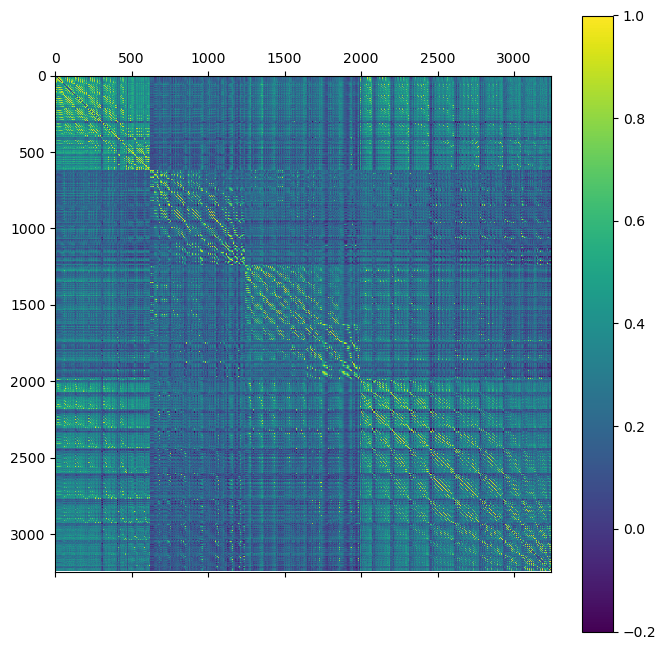

---- 5HT ---- processing region  66 20230513-r5HT1.0-fly1  ----
outpath:  /0-WYL/pipeline/p6_network_analysis/result/flies_5HT\20230513-r5HT1.0-fly1-trans-stimu\
similarity: (3244, 3244)


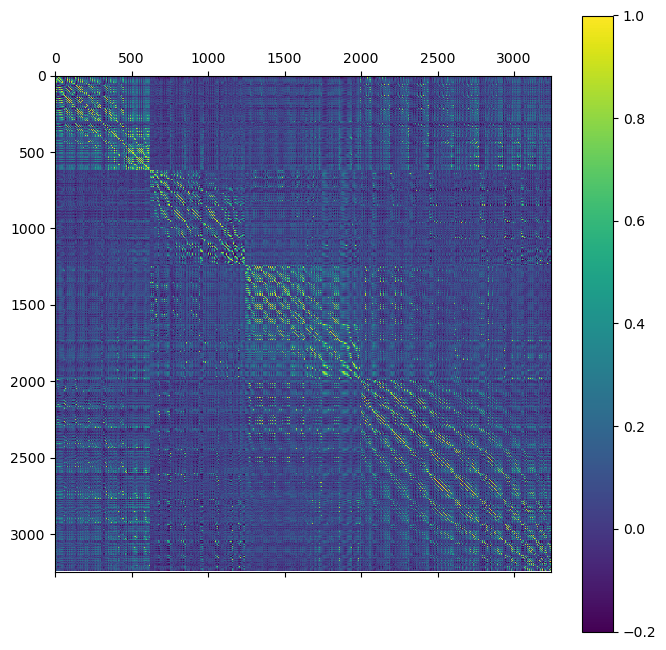

---- Delta ---- processing region  66  --- data_index  20230513-r5HT1.0-fly1 ------------


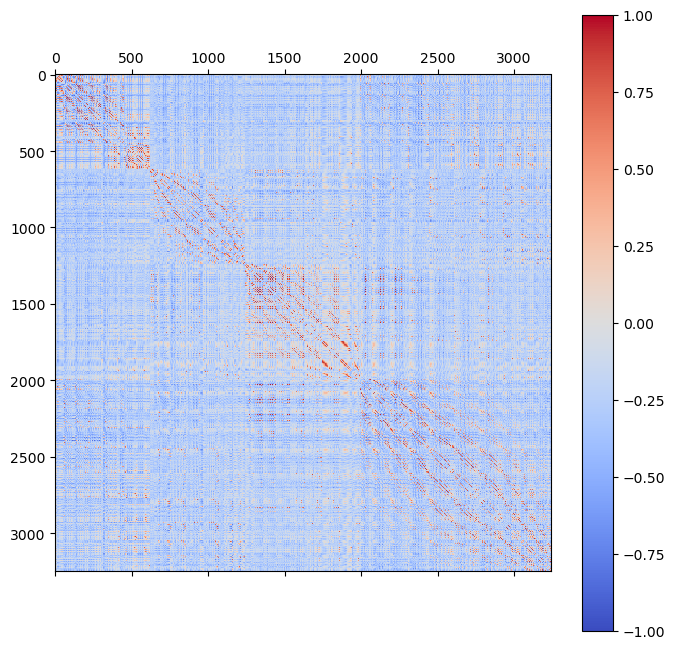

---- G7f ---- processing region  55 20230506-r5HT1.0-fly1  ----
outpath:  /0-WYL/pipeline/p6_network_analysis/result/flies_5HT\20230506-r5HT1.0-fly1-stimu\
similarity: (455, 455)


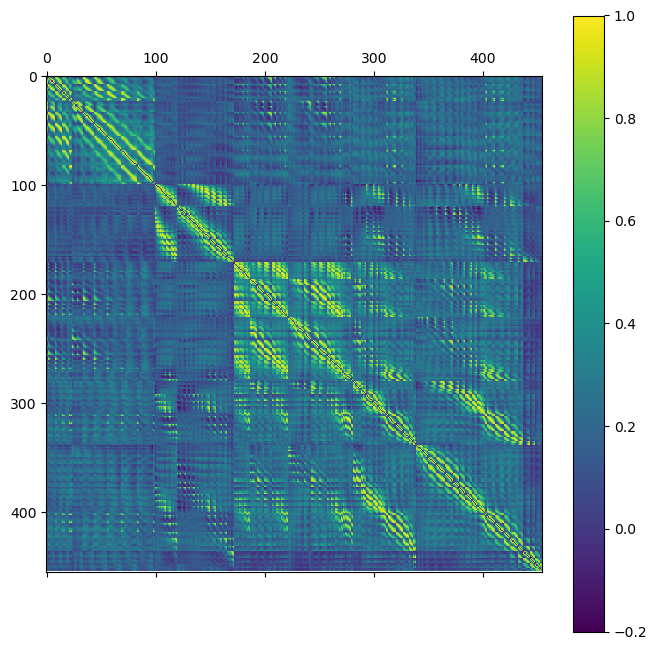

---- 5HT ---- processing region  55 20230506-r5HT1.0-fly1  ----
outpath:  /0-WYL/pipeline/p6_network_analysis/result/flies_5HT\20230506-r5HT1.0-fly1-trans-stimu\
similarity: (455, 455)


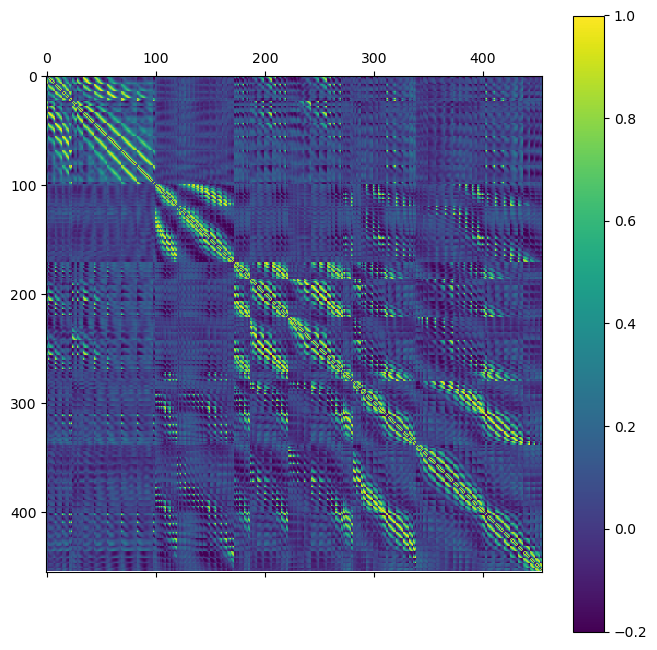

---- Delta ---- processing region  55  --- data_index  20230506-r5HT1.0-fly1 ------------


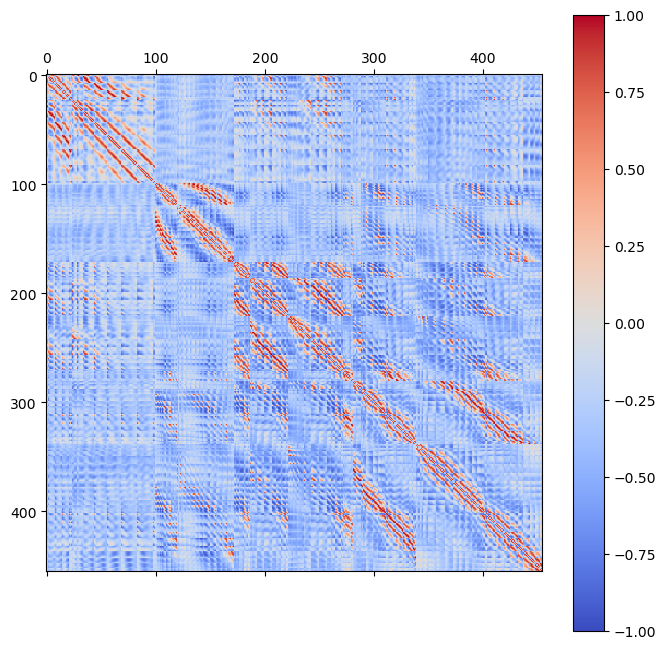

END


In [3]:
'''
Functional connectivity matrix within each region in Stimu stage
'''

## define normalization method
def normalization(data, new_min, new_max):
    old_min = np.min(data)
    old_max = np.max(data)
    return (data - old_min) * (new_max - new_min) / (old_max - old_min) + new_min

## parameters
region_idx_given = [66,55]
data_index_given = ['20230513-r5HT1.0-fly1','20230506-r5HT1.0-fly1']

## plot correlation matrices
for cnt in range(len(region_idx_given)):
    region_idx =  region_idx_given[cnt]
    data_index = data_index_given[cnt]
    
    ## plot G7f correlation matrix
    print("---- G7f ---- processing region ", region_idx, data_index," ----")
    outpath = path + 'flies_5HT\\' + data_index + '-stimu\\'
    print("outpath: ", outpath)
    # load record data
    similarity = np.load(outpath + 'network\\region_' + str(region_idx) +'_all_neurons_similarity_hierarchy.npy',allow_pickle=True)
    print("similarity:", similarity.shape)
    figure = plt.figure(figsize=(8,8)) 
    axes = figure.add_subplot(111) 
    caxes = axes.matshow(similarity, interpolation ='nearest', vmin = -0.2, vmax = 1) 
    figure.colorbar(caxes) 
    plt.savefig(outpath + 'network\\region_' + str(region_idx) +'_all_neurons_similarity_hierarchy.png',  dpi = 300, bbox_inches='tight')
    plt.savefig(outpath + 'network\\region_' + str(region_idx) +'_all_neurons_similarity_hierarchy.pdf',  dpi = 300, bbox_inches='tight')
    plt.show()

    ## plot ACh correlation matrix
    print("---- 5HT ---- processing region ", region_idx, data_index," ----")
    outpath = path + 'flies_5HT\\' + data_index + '-trans-stimu\\'
    print("outpath: ", outpath)
    # load record data
    similarity = np.load(outpath + 'network\\region_' + str(region_idx) +'_all_neurons_similarity_hierarchy1.npy',allow_pickle=True)
    print("similarity:", similarity.shape)
    figure = plt.figure(figsize=(8,8)) 
    axes = figure.add_subplot(111) 
    caxes = axes.matshow(similarity, interpolation ='nearest', vmin = -0.2, vmax = 1) 
    figure.colorbar(caxes) 
    plt.savefig(outpath + 'network\\region_' + str(region_idx) +'_all_neurons_similarity_hierarchy1.png',  dpi = 300, bbox_inches='tight')
    plt.savefig(outpath + 'network\\region_' + str(region_idx) +'_all_neurons_similarity_hierarchy1.pdf',  dpi = 300, bbox_inches='tight')
    plt.show()

    ## plot Delta correlation matrix
    print("---- Delta ---- processing region ", region_idx, " --- data_index ", data_index, "------------")
    ori_path = path + 'flies_5HT\\' + data_index + '-stimu\\'
    A1 = np.load(ori_path + "network\\region_" + str(region_idx) + "_all_neurons_similarity_hierarchy.npy")
    A1 = np.nan_to_num(A1)
    A1_avg = np.full((len(A1), len(A1)), np.mean(A1))
    A1_delta = A1 - A1_avg
    A1_delta = A1_delta / A1_avg

    ori_path = path + 'flies_5HT\\' + data_index + '-trans-stimu\\'
    A2 = np.load(ori_path + "network\\region_" + str(region_idx) + "_all_neurons_similarity_hierarchy1.npy")
    A2 = np.nan_to_num(A2)
    A2_avg = np.full((len(A2), len(A2)), np.mean(A2))
    A2_delta = A2 - A2_avg
    A2_delta = A2_delta / A2_avg

    A = A2_delta - A1_delta
    A = np.nan_to_num(A)
    A = normalization(A, -1, 1)
    figure = plt.figure(figsize=(8,8)) 
    axes = figure.add_subplot(111) 
    caxes = axes.matshow(A, interpolation ='nearest', cmap = "coolwarm", vmin = -1, vmax = 1) 
    figure.colorbar(caxes) 
    plt.savefig(path + 'flies_5HT\\' + data_index + '-trans-stimu\\network\\region_' + str(region_idx) +'_all_neurons_similarity_hierarchy_dff_new.png',  dpi = 300, bbox_inches='tight')
    plt.savefig(path + 'flies_5HT\\' + data_index + '-trans-stimu\\network\\region_' + str(region_idx) +'_all_neurons_similarity_hierarchy_dff_new.pdf',  dpi = 300, bbox_inches='tight')
    plt.show()

print("END")

In [11]:
'''
3D functional connectivity network (G7f or 5HT) within each region in Stimu stage
'''

## parameters
region_index_list = [66,55]
data_index_list = ['20230513-r5HT1.0-fly1','20230506-r5HT1.0-fly1']
delete_seg_list = [0.9,0.9]
n_sample = 3000

for region_cnt in range(len(region_index_list)):
    
    region_index = region_index_list[region_cnt]
    data_index = data_index_list[region_cnt]
    print("----------- processing region: ", region_index, " ----- date: ", data_index, " -----------------------------")
    
    '''
    G7f network
    '''
    ori_path = path + 'flies_5HT\\' + data_index + '-stimu\\'

    ## load position data
    positions_dict = np.load(ori_path + 'neuron_concat_records\\region_' + str(region_index) + '_neuron_positions.npy',allow_pickle=True).item()
    positions = []
    for k,v in positions_dict.items():
        for x_y in v:
            positions.append((x_y[0], x_y[1], k))
    
    ## load record data
    similarity = np.load(ori_path + 'network\\region_' + str(region_index) + '_all_neurons_similarity.npy',allow_pickle=True)
    if len(similarity) <= 3000:
        similarity_fla = similarity.flatten()
    else: # sample nodes randomly for the networks with too mang nodes
        sample_neurons = random.sample([i for i in range(len(similarity))],n_sample)
        sample_neurons.sort()
        positions = [positions[i] for i in sample_neurons]
        similarity_new = np.zeros((n_sample,n_sample))
        for i in range(n_sample - 1):
            for j in range(i + 1, n_sample):
                similarity_new[i,j] = similarity_new[j,i] = similarity[sample_neurons[i], sample_neurons[j]]
            np.save(path + 'single_region_networks-Vis\\calc_network_region_' + str(region_index) + '_' + data_index + '_all_neurons_similarity_sample' + str(n_sample) + '.npy',similarity_new)
            np.save(path + 'single_region_networks-Vis\\calc_network_region_' + str(region_index) + '_' + data_index + '_all_neurons_positions_sample' + str(n_sample) + '.npy',positions)
        similarity = similarity_new
        similarity_fla = similarity.flatten()

    ## delete edges
    delete_seg = delete_seg_list[region_cnt]
    similarity_fla.sort()
    threshold = similarity_fla[int(delete_seg * len(similarity_fla))]

    weighted_edges = [] 
    pos_3d = {}
    n_neurons = len(similarity)
    for i in range(n_neurons - 1):
        if i not in pos_3d:
            pos_3d[i] = positions[i]
        for j in range(i + 1, n_neurons):   
            if similarity[i,j] < threshold:
                continue
            weighted_edges.append(np.array([i,j, np.round(similarity[i,j],3)]))
            if j not in pos_3d:
                pos_3d[j] = positions[j]            

    ## generate network
    G = nx.Graph()
    G.add_weighted_edges_from(weighted_edges)
    n_nodes, n_edges = G.number_of_nodes(),G.number_of_edges()
    print("G7f network #node:", n_nodes, "#edges:", n_edges)
    
    ## extract node positions from the layout
    node_xyz = np.array([pos_3d[v] for v in sorted(G)])
    Xn=[]
    Yn=[]
    Zn=[]
    for k in range(len(G.nodes())):
        Xn+=[node_xyz[k][0]]
        Yn+=[node_xyz[k][1]]
        Zn+=[node_xyz[k][2]]
       
    ## extract node positions from the layout 
    edge_xyz = np.array([(pos_3d[u], pos_3d[v]) for u, v in G.edges()])
    Xe=[]
    Ye=[]
    Ze=[]
    for edge in edge_xyz:
        Xe+=[edge[0][0],edge[1][0],None]
        Ye+=[edge[0][1],edge[1][1],None]
        Ze+=[edge[0][2],edge[1][2],None]

    xaxis=dict(showbackground=True, showline=False, zeroline=False, showgrid=True, showticklabels=True, title='x')
    yaxis=dict(showbackground=True, showline=False, zeroline=False, showgrid=True, showticklabels=True, title='y')
    zaxis=dict(showbackground=True, showline=False, zeroline=False, showgrid=True, showticklabels=True, title='depth')

    ## detect communities
    asyn_partition = list(community.louvain_communities(G, weight='weight'))
    node_par = {}
    for i in range(len(list(asyn_partition))):
        nodes = list(list(asyn_partition)[i])
        for node in nodes:
            node_par[node] = i
    group = np.array([node_par[v] for v in sorted(G)])
    
    ## plot 3D network
    layout = go.Layout(
             title="Three-dimensional visualization of neural functional network (G7f) in brain region " + str(region_name_dict_reverse[region_index]),
             width=1000,
             height=1000,
             showlegend=False,
             scene=dict(
                 xaxis=dict(xaxis),
                 yaxis=dict(yaxis),
                 zaxis=dict(zaxis),
            )
    )
    trace1=go.Scatter3d(x=Xe, y=Ye, z=Ze, mode='lines', line=dict(color='rgb(125,125,125)', width=0.05), hoverinfo='none')
    trace2=go.Scatter3d(x=Xn, y=Yn, z=Zn, mode='markers', name='actors', 
                       marker=dict(symbol='circle', size=10, color=group, colorscale='Viridis', 
                       line=dict(color='rgb(50,50,50)', width=0.5))) #, hoverinfo='text') # , text=labels
    data=[trace1, trace2]
    fig=go.Figure(data=data, layout=layout)
    plot(fig, filename = path + 'single_region_networks-Vis\\calc_network_region_' + str(region_index) + '_colored_by_community_' + data_index + '.html')

    
    
    '''
    5HT network
    '''
    ori_path = path + 'flies_5HT\\' + data_index + '-trans-stimu\\'

    ## load position data
    positions_dict = np.load(ori_path +'neuron_concat_records\\region_' + str(region_index) +'_neuron_positions.npy',allow_pickle=True).item()
    positions = []
    for k,v in positions_dict.items():
        for x_y in v:
            positions.append((x_y[0], x_y[1], k))

    ## load record data
    similarity = np.load(ori_path + 'network\\region_' + str(region_index) + '_all_neurons_similarity.npy',allow_pickle=True)
    if len(similarity) <= 3000:
        similarity_fla = similarity.flatten()
    else: # sample nodes randomly for the networks with too mang nodes
        sample_neurons = random.sample([i for i in range(len(similarity))],n_sample)
        sample_neurons.sort()
        positions = [positions[i] for i in sample_neurons]
        similarity_new = np.zeros((n_sample,n_sample))
        for i in range(n_sample - 1):
            for j in range(i + 1, n_sample):
                similarity_new[i,j] = similarity_new[j,i] = similarity[sample_neurons[i], sample_neurons[j]]
            np.save(path + 'single_region_networks-Vis\\calc_network_region_' + str(region_index) + '_' + data_index + '_all_neurons_similarity_sample' + str(n_sample) + '.npy',similarity_new)
            np.save(path + 'single_region_networks-Vis\\calc_network_region_' + str(region_index) + '_' + data_index + '_all_neurons_positions_sample' + str(n_sample) + '.npy',positions)
        similarity = similarity_new
        similarity_fla = similarity.flatten()

    ## delete edges
    delete_seg = delete_seg_list[region_cnt]
    similarity_fla.sort()
    threshold = similarity_fla[int(delete_seg * len(similarity_fla))]
    weighted_edges = [] 
    pos_3d = {}
    n_neurons = len(similarity)
    for i in range(n_neurons - 1):
        if i not in pos_3d:
            pos_3d[i] = positions[i]
        for j in range(i + 1, n_neurons):   
            if similarity[i,j] < threshold:
                continue
            weighted_edges.append(np.array([i,j, np.round(similarity[i,j],3)]))
            if j not in pos_3d:
                pos_3d[j] = positions[j]   
    
    ## generate network
    G = nx.Graph()
    G.add_weighted_edges_from(weighted_edges)
    n_nodes, n_edges = G.number_of_nodes(),G.number_of_edges()
    print("5HT network #node:", n_nodes, "#edges:", n_edges)
    
    ## extract node positions from the layout
    node_xyz = np.array([pos_3d[v] for v in sorted(G)])
    Xn=[]
    Yn=[]
    Zn=[]
    for k in range(len(G.nodes())):
        Xn+=[node_xyz[k][0]]
        Yn+=[node_xyz[k][1]]
        Zn+=[node_xyz[k][2]]
       
    ## extract edge positions from the layout 
    edge_xyz = np.array([(pos_3d[u], pos_3d[v]) for u, v in G.edges()])
    Xe=[]
    Ye=[]
    Ze=[]
    for edge in edge_xyz:
        Xe+=[edge[0][0],edge[1][0],None]
        Ye+=[edge[0][1],edge[1][1],None]
        Ze+=[edge[0][2],edge[1][2],None]

    xaxis=dict(showbackground=True, showline=False, zeroline=False, showgrid=True, showticklabels=True, title='x')
    yaxis=dict(showbackground=True, showline=False, zeroline=False, showgrid=True, showticklabels=True, title='y')
    zaxis=dict(showbackground=True, showline=False, zeroline=False, showgrid=True, showticklabels=True, title='depth')

    ## detect comunities
    asyn_partition = list(community.louvain_communities(G, weight='weight'))
    node_par = {}
    for i in range(len(list(asyn_partition))):
        nodes = list(list(asyn_partition)[i])
        for node in nodes:
            node_par[node] = i
    group = np.array([node_par[v] for v in sorted(G)])

    ## plot 3D network
    layout = go.Layout(
             title="Three-dimensional visualization of neural functional network (5HT) in brain region " + str(region_name_dict_reverse[region_index]),
             width=1000,
             height=1000,
             showlegend=False,
             scene=dict(
                 xaxis=dict(xaxis),
                 yaxis=dict(yaxis),
                 zaxis=dict(zaxis),
            )
    )
    trace1=go.Scatter3d(x=Xe, y=Ye, z=Ze, mode='lines', line=dict(color='rgb(125,125,125)', width=0.05), hoverinfo='none')
    trace2=go.Scatter3d(x=Xn, y=Yn, z=Zn, mode='markers', name='actors', 
                       marker=dict(symbol='circle', size=10, color=group, colorscale='Viridis', 
                       line=dict(color='rgb(50,50,50)', width=0.5))) #, hoverinfo='text') # , text=labels
    data=[trace1, trace2]
    fig=go.Figure(data=data, layout=layout)

    plot(fig, filename = path + 'single_region_networks-Vis\\5ht_network_region_' + str(region_index) + '_colored_by_community_' + data_index + '.html')

print("END")

----------- processing region:  66  ----- date:  20230513-r5HT1.0-fly1  -----------------------------
G7f network #node: 3000 #edges: 450000
5HT network #node: 3000 #edges: 450000
END


In [14]:
'''
3D functional connectivity network (Delta) within each region in Stimu stage
'''

## parameters
region_index_list = [66,55]
data_index_list = ['20230513-r5HT1.0-fly1','20230506-r5HT1.0-fly1']
delete_seg_list = [0.0009,0.003]

for region_cnt in range(len(region_index_list)):
    region_index = region_index_list[region_cnt]
    data_index = data_index_list[region_cnt]
    print("----------- processing region: ", region_index, " ----- date: ", data_index, " -----------------------------")

    ## load position data
    ori_path = path + 'flies_5HT\\' + data_index + '-stimu\\'
    positions_dict = np.load(ori_path +'neuron_concat_records\\region_' + str(region_index) +'_neuron_positions.npy',allow_pickle=True).item()
    if len(positions_dict) <= 3000:
        positions = []
        for k,v in positions_dict.items():
            for x_y in v:
                positions.append((x_y[0], x_y[1], k))
    else:
        positions = np.load(path +'single_region_networks-Vis\\calc_network_region_' + str(region_index) + '_' + data_index + '_all_neurons_positions_sample' + str(n_sample) + '.npy',allow_pickle=True)
    
    ## load G7f correlation matrix
    ori_path = path + 'flies_5HT\\' + data_index + '-stimu\\'
    A1 = np.load(ori_path + "network\\region_" + str(region_index) + "_all_neurons_similarity.npy")
    if len(A1) > 3000:
        A1 = np.load(path +'single_region_networks-Vis\\calc_network_region_' + str(region_index) + '_' + data_index + '_all_neurons_similarity_sample' + str(n_sample) + '.npy',allow_pickle=True)
    A1 = np.nan_to_num(A1)
    A1_avg = np.full((len(A1), len(A1)), np.mean(A1))
    A1_delta = A1 - A1_avg
    A1_delta = A1_delta / A1_avg

    ## load 5HT correlation matrix
    ori_path = path + 'flies_5HT\\' + data_index + '-trans-stimu\\'
    A2 = np.load(ori_path + "network\\region_" + str(region_index) + "_all_neurons_similarity.npy")
    if len(A2) > 3000:
        A2 = np.load(path +'single_region_networks-Vis\\5ht_network_region_' + str(region_index) + '_' + data_index + '_all_neurons_similarity_sample' + str(n_sample) + '.npy',allow_pickle=True)
    A2 = np.nan_to_num(A2)
    A2_avg = np.full((len(A2), len(A2)), np.mean(A2))
    A2_delta = A2 - A2_avg
    A2_delta = A2_delta / A2_avg

    ## calculate the difference
    dff_similarity = A2_delta - A1_delta
    dff_similarity = np.nan_to_num(dff_similarity)
    
    ## delete edges
    n_neurons = len(dff_similarity)
    delete_seg = delete_seg_list[region_cnt]
    pos_edges, neg_edges = [], []
    for i in range(n_neurons - 1):
        for j in range(i + 1, n_neurons):  
            w = dff_similarity[i,j]
            if w > 0:
                pos_edges.append(w)
            elif w < 0:
                neg_edges.append(w)
    pos_edges.sort()
    if len(pos_edges) == 0:
        threshold_pos = 0
    else:
        threshold_pos = pos_edges[int((1 - delete_seg) * len(pos_edges))]
    neg_edges.sort()
    threshold_neg = neg_edges[int(delete_seg * len(neg_edges))]
    
    ## select nodes and edges
    weighted_edges_pos = []
    weighted_edges_neg = []
    pos_3d = {}
    nodes = []
    nodes_pos = []
    nodes_neg = []
    for i in range(n_neurons - 1):
        if i not in pos_3d:
            pos_3d[i] = positions[i] 
            nodes.append(i)
        for j in range(i + 1, n_neurons):   
            w = dff_similarity[i,j]
            if w > threshold_pos:
                weighted_edges_pos.append(np.array([i,j, np.round(w,3)]))       
                if i not in nodes_pos:
                    nodes_pos.append(i) 
                if j not in nodes_pos:
                    nodes_pos.append(j) 
            elif w < threshold_neg:
                weighted_edges_neg.append(np.array([i,j, np.round(w,3)]))   
                if i not in nodes_neg:
                    nodes_neg.append(i) 
                if j not in nodes_neg:
                    nodes_neg.append(j)
            if j not in pos_3d:
                pos_3d[j] = positions[j] 
                nodes.append(j)
                
    ## generate network
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(weighted_edges_pos)
    n_nodes, n_edges = G.number_of_nodes(),G.number_of_edges()
    print("Delta network #node:", n_nodes, "#edges:", n_edges)
    
    ## extract node positions from the layout
    node_xyz = np.array([pos_3d[v] for v in sorted(G)])
    Xn=[]
    Yn=[]
    Zn=[]
    for k in range(len(G.nodes())):
        Xn+=[node_xyz[k][0]]
        Yn+=[node_xyz[k][1]]
        Zn+=[node_xyz[k][2]]
        
    ## extract edge positions from the layout  
    edge_xyz = np.array([(pos_3d[u], pos_3d[v]) for u, v in G.edges()])
    Xe=[]
    Ye=[]
    Ze=[]
    for edge in edge_xyz:
        Xe+=[edge[0][0],edge[1][0],None]
        Ye+=[edge[0][1],edge[1][1],None]
        Ze+=[edge[0][2],edge[1][2],None]

    xaxis=dict(showbackground=True, showline=False, zeroline=False, showgrid=True, showticklabels=True, title='x')
    yaxis=dict(showbackground=True, showline=False, zeroline=False, showgrid=True, showticklabels=True, title='y')
    zaxis=dict(showbackground=True, showline=False, zeroline=False, showgrid=True, showticklabels=True, title='depth')

    ## node colors
    node_par = {}
    for node in nodes:
        if node in nodes_pos:
            node_par[node] = "#F8AC8C"
        else:
            node_par[node] = "#2878B5"
    group = np.array([node_par[v] for v in sorted(G)])
    
    ## plot 3D network
    layout = go.Layout(
             title="Three-dimensional visualization of neural functional network (Delta) in brain region " + str(region_name_dict_reverse[region_index]),
             width=1000,
             height=1000,
             showlegend=False,
             scene=dict(
                 xaxis=dict(xaxis),
                 yaxis=dict(yaxis),
                 zaxis=dict(zaxis),
            ))
    trace1=go.Scatter3d(x=Xe, y=Ye, z=Ze, mode='lines', line=dict(color='rgb(125,125,125)', width=0.05), hoverinfo='none')
    trace2=go.Scatter3d(x=Xn, y=Yn, z=Zn, mode='markers', name='actors', 
                       marker=dict(symbol='circle', size=10, color=group,
                       line=dict(color='rgb(50,50,50)', width=0.5)))
    data=[trace1, trace2]
    fig=go.Figure(data=data, layout=layout)

    plot(fig, filename = path + 'single_region_networks-Vis\\3Dnetwork_positive_region_' + str(region_index) + '_colored_by_' + data_index + '.html')
        
print("END")

----------- processing region:  66  ----- date:  20230513-r5HT1.0-fly1  -----------------------------
Delta network #node: 3000 #edges: 1752
----------- processing region:  55  ----- date:  20230506-r5HT1.0-fly1  -----------------------------
Delta network #node: 455 #edges: 131
END


## Figure S8-K

------ processing region  MBPED
------ processing region  MBVL
------ processing region  MBML
------ processing region  SIP
------ processing region  CRE
------ processing region  SCL
------ processing region  ICL
------ processing region  EB
------ processing region  FB
------ processing region  LH
------ processing region  EPA
------ processing region  AOTU
------ processing region  IVLP


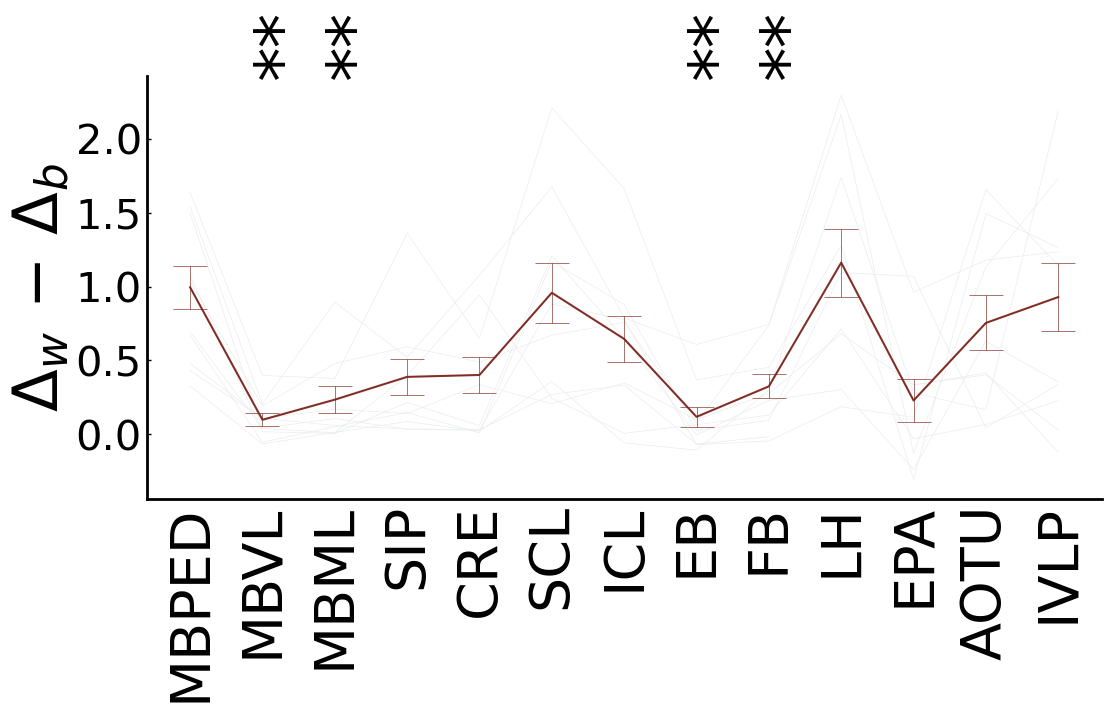

In [4]:
## parameters
region_names_gain = ["MBPED","MBVL", "MBML","SIP","CRE", "SCL", "ICL", "EB", "FB"]
region_names_nongain = ["LH", "EPA", "AOTU","IVLP"]
region_names = region_names_gain + region_names_nongain

'''
initialization
'''

calc_total, trans_total, df_mean_total = {}, {}, {}
df_median_total = {}
for k in region_names:
    calc_total[k] = []
    trans_total[k] = []
    df_mean_total[k] = []
    
'''
calculate the defined metrics
'''

records_all = []
for region in region_names:   
    print("------ processing region ", region)
    
    region_index = region_name_dict[region]
    records_region = []
    for data_index in data_index_list_0: 
        
        if region_index in [55] and data_index not in data_index_list_55:
            df_mean_total[region].append(float('nan'))
            records_region.append(float('nan'))
            continue

        ## load G7f correlation matrix
        ori_path = path + 'flies_5HT\\' + data_index + '-stimu\\'
        A1 = np.load(ori_path + "network\\region_" + str(region_index) + "_all_neurons_similarity_hierarchy.npy")
        A1 = np.nan_to_num(A1)
        A1_avg = np.full((len(A1), len(A1)), np.mean(A1))
        A1_delta = A1 - A1_avg
        A1_delta = A1_delta / A1_avg
        
        ## load G7f region order
        idpart = np.load(ori_path + "network\\region_" + str(region_index) + "_all_neurons_similarity_hierarchy_idpart.npy", allow_pickle=True)
        id_regions = []
        start = 0
        for part in idpart:
            end = start + len(part)
            id_regions.append((start, end))
            start = end
        
        ## load 5HT region order
        ori_path = path + 'flies_5HT\\' + data_index + '-trans-stimu\\'
        A2 = np.load(ori_path + "network\\region_" + str(region_index) + "_all_neurons_similarity_hierarchy1.npy")
        A2 = np.nan_to_num(A2)
        A2_avg = np.full((len(A2), len(A2)), np.mean(A2))
        A2_delta = A2 - A2_avg
        A2_delta = A2_delta / A2_avg
        
        ## avoid error
        if len(A1) != len(A2):
            continue

        ## calculate the positive difference matrix
        A = A2_delta - A1_delta
        A = np.nan_to_num(A)
        A[A < 0] = 0

        ## the average positive difference between communities
        betweeb_avg_sum = 0
        betweeb_avg_count = 0
        for i in range(len(id_regions)):
            if i == len(id_regions) - 1:
                break
            id_region = id_regions[i]
            id_A = A[id_region[0]:id_region[1], id_region[1]:len(A)]
            betweeb_avg_sum += np.sum(id_A)
            betweeb_avg_count += np.count_nonzero(id_A)
        between_avg = betweeb_avg_sum / betweeb_avg_count if betweeb_avg_count != 0 else 0
            
        ## the average positive difference within communities
        within_avg_sum = 0
        within_avg_count = 0
        for id_region in id_regions:
            id_A = A[id_region[0]:id_region[1], id_region[0]:id_region[1]]
            within_avg_sum += np.sum(id_A)
            within_avg_count += np.count_nonzero(id_A)
        within_avg = within_avg_sum / within_avg_count if within_avg_count != 0 else 0
    
        ## the difference within and between communities
        avg = within_avg - between_avg
        df_mean_total[region].append(avg)
        records_region.append(avg)
    records_all.append(records_region)
    
'''
Test
'''

## some regions of the specified flies are not used
list_0 = [0,1,2,3,4,5,6,8,9]

## test between each region with accuracy gain and the average values of regions without gain
n_region_nongain = len(region_names_nongain)
epa_new = [df_mean_total["EPA"][i] for i in list_0]
lh_new = [df_mean_total["LH"][i] for i in list_0]
aotu_new = [df_mean_total["AOTU"][i] for i in list_0]
ivlp_new = [df_mean_total["IVLP"][i] for i in list_0]
nongain_list = (np.array(lh_new) + np.array(epa_new) + np.array(aotu_new) + np.array(ivlp_new)) / n_region_nongain

test_info = []
for i in region_names_gain:
    i_new = [df_mean_total[i][j] for j in list_0]
    stat, p_value = stats.wilcoxon(i_new, nongain_list, alternative='two-sided', correction=True)
    if p_value > 0.05:
        test_info.append("")
    elif p_value <= 0.05 and p_value > 0.01:
        test_info.append("*")
    elif p_value <= 0.01 and p_value > 0.001:
        test_info.append("**")
    elif p_value <= 0.001 and p_value > 0.0001:
        test_info.append("***")
    elif p_value < 0.0001:
        test_info.append("****")

'''
graphing
'''
plt.figure(figsize=(11,7),dpi=100,facecolor="w", constrained_layout=True)
ax = plt.subplot(1,1,1)
avg, std = [], []
for i in region_names:
    avg.append(np.mean([df_mean_total[i][j] for j in list_0]))
    std.append(np.std([df_mean_total[i][j] for j in list_0]))
std_yy = np.array(std) / math.sqrt(10) 
## plot recordings of each fly
for i in range(len(records_all[0])):
    records = [j[i] for j in records_all]
    plt.plot(records, color = "#EAEDED", linewidth = 0.5)
## plot average recordings
plt.errorbar(region_names, avg, yerr = std_yy, fmt = '', ecolor = '#7B241C',  elinewidth = 0.5, capthick = 0.5,
             color = "#7B241C", capsize = 12, ms = 17, mfc = 'w', alpha = 0.9)
plt.plot(avg, color = "#7B241C", linewidth = 0.5, alpha = 0.9)
## add testing info
for i in range(len(region_names_gain)):
    plt.text(i * 1 - 0.16, 2.5, test_info[i], fontsize = 50, rotation = 90)
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=15,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
ax.set_ylabel(r'$\Delta_{w}\, - \, \Delta_{b}$', fontsize= 45)
plt.xticks(rotation = 90, fontsize = 40)
plt.yticks(fontsize = 30)
plt.savefig(path+"single_region_networks-Vis\\cw-cb_dff_of_similarity_calc_5ht.png",  dpi = 300, bbox_inches='tight')
plt.savefig(path+"single_region_networks-Vis\\cw-cb_dff_of_similarity_calc_5ht.pdf",  dpi = 300, bbox_inches='tight')
plt.show()

## Figure S8-L

No data about G7f -  20230601-r5HT1.0-fly1 55
No data about 5HT -  20230601-r5HT1.0-fly1 55


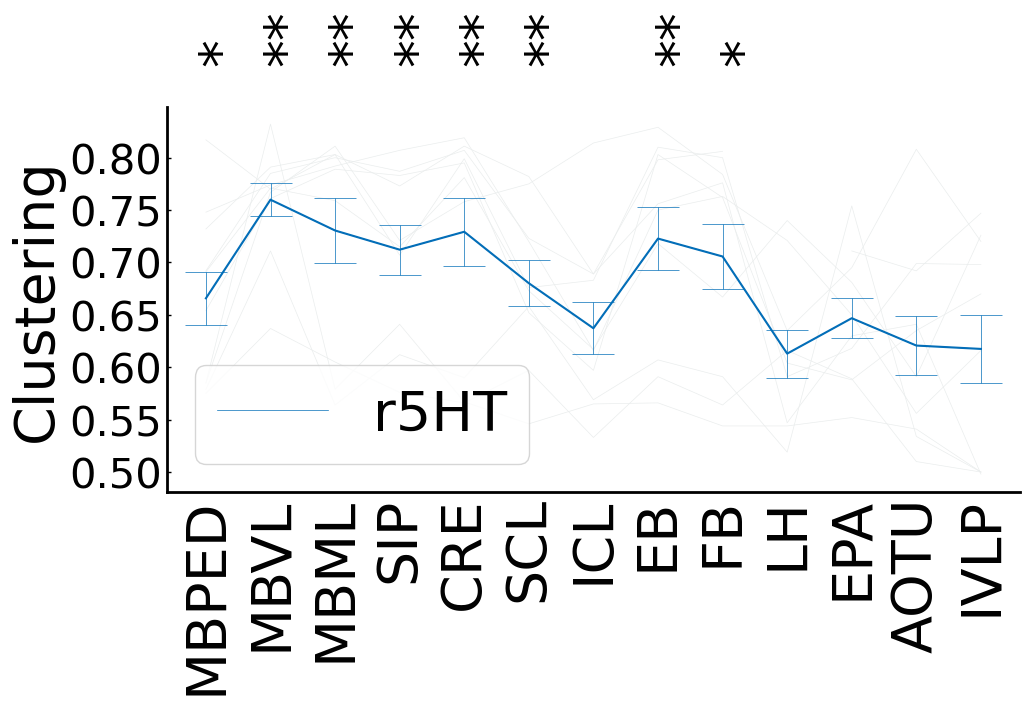

In [5]:
## parameters
region_names_gain = ["MBPED","MBVL", "MBML","SIP","CRE", "SCL", "ICL", "EB", "FB"]
region_names_nongain = ["LH", "EPA", "AOTU","IVLP"]
region_names = region_names_gain + region_names_nongain

metrics = 3

'''
collect network clustering data
'''

## all data
calc_clustering, trans_clustering = [], []
for data_index in data_index_list_0:
    
    calc, trans = [], []
    for stage in region_names:
        region_index = region_name_dict[stage]

        ori_path = path + 'flies_5HT\\' + data_index + '-stimu\\network_stat\\'
        try:
            data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
            calc.append(data_df.iloc[metrics,1])
        except Exception as e:
            calc.append(float('nan'))
            # default value is 20230601-r5HT1.0-fly1 55
            print("No data about G7f - ",data_index, region_index) 
        
        ori_path = path + 'flies_5HT\\' + data_index + '-trans-stimu\\network_stat\\'
        try:
            data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
            if data_df.iloc[metrics,1] > 0:
                trans.append(data_df.iloc[metrics,1])
            else:
                trans.append(float('nan'))
        except Exception as e:
            trans.append(float('nan'))
            # default value is 20230601-r5HT1.0-fly1 55
            print("No data about 5HT - ",data_index, region_index)
            
    calc_clustering.append(calc)
    trans_clustering.append(trans)

## existing data
calc_data, trans_data = [], []
for stage in region_names:
    region_index = region_name_dict[stage]
    
    data_index_list = []
    if region_index in [55]:
        data_index_list = data_index_list_55
    else:
        data_index_list = data_index_list_0

    calc, trans = [], []
    for data_index in data_index_list:
        ori_path = path + 'flies_5HT\\' + data_index + '-stimu\\network_stat\\'
        try:
            data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
            calc.append(data_df.iloc[metrics,1]) 
        except Exception as e:
            print("No data about G7f - ",data_index, region_index)
        
        ori_path = path + 'flies_5HT\\' + data_index + '-trans-stimu\\network_stat\\'
        try:
            data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
            if data_df.iloc[metrics,1] > 0:
                trans.append(data_df.iloc[metrics,1])
        except Exception as e:
            print("No data about 5HT - ",data_index, region_index)
            
    calc_data.append(calc)
    trans_data.append(trans)

'''
Test
'''

## some regions of the specified flies are not used
list_0 = [0,1,2,3,4,5,6,8,9]

## process the regions without accuracy gain
base_lh = [i[9] for i in trans_clustering if not math.isnan(i[9])]
base_epa = [i[10] for i in trans_clustering if not math.isnan(i[10])]
base_aotu = [i[11] for i in trans_clustering if not math.isnan(i[11])]
base_ivlp = [i[12] for i in trans_clustering if not math.isnan(i[12])]

## test between each region with accuracy gain and the average values of regions without gain
test_info = []
for reion_i in range(len(region_names_gain)):
    epa_new = [base_epa[i] for i in list_0]
    aotu_new = [base_aotu[i] for i in list_0]
    ivlp_new = [base_ivlp[i] for i in list_0]
    nongain_list = (np.array(base_lh) + np.array(epa_new) + np.array(aotu_new) + np.array(ivlp_new)) / 4
    base_i = [i[reion_i] for i in trans_clustering if not math.isnan(i[reion_i])]
    i_new = [base_i[j] for j in  list_0]
         
    stat, p_value = stats.wilcoxon(i_new, nongain_list, alternative='greater', correction=True)
    if p_value > 0.05:
        test_info.append("")
    elif p_value <= 0.05 and p_value > 0.01:
        test_info.append("*")
    elif p_value <= 0.01 and p_value > 0.001:
        test_info.append("**")
    elif p_value <= 0.001 and p_value > 0.0001:
        test_info.append("***")
    elif p_value < 0.0001:
        test_info.append("****")
        
'''
graphing
'''
avg = [np.mean(i) for i in trans_data]
std = [np.std(i) for i in trans_data]
std_yy = np.array(std) / math.sqrt(10)
plt.figure(figsize=(11,5),dpi=100,facecolor="w")
ax = plt.subplot(1,1,1)
## plot recordings of each fly
for i in trans_clustering:
    plt.plot(i, color = "#EAEDED", linewidth = 0.5)
## plot average recordings
plt.errorbar(region_names, avg, yerr = std_yy, fmt = '', ecolor = '#036EB8', elinewidth = 0.5, color = "#036EB8", capsize = 15, capthick = 0.5)
plt.plot(avg, color = "#036EB8", linewidth = 0.5, label = "r5HT")
## add testing info
for i in range(len(region_names_gain)):
    plt.text(i * 1.01 - 0.15, 0.9, test_info[i], fontsize = 40, rotation = 90)
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=15,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
ax.set_ylabel("Clustering", fontsize= 40)
plt.xticks(rotation = 90, fontsize = 40)
plt.yticks(fontsize = 30)
plt.legend(loc = 3, fontsize = 40)
xlabels = ax.get_xticklabels()
plt.savefig(path+"single_region_networks-Vis\\network_calustering_5ht.png",  dpi = 300, bbox_inches='tight')
plt.savefig(path+"single_region_networks-Vis\\network_calustering_5ht.pdf",  dpi = 300, bbox_inches='tight')
plt.show()


## Figure S8-M

No data about delta -  20230601-r5HT1.0-fly1 55


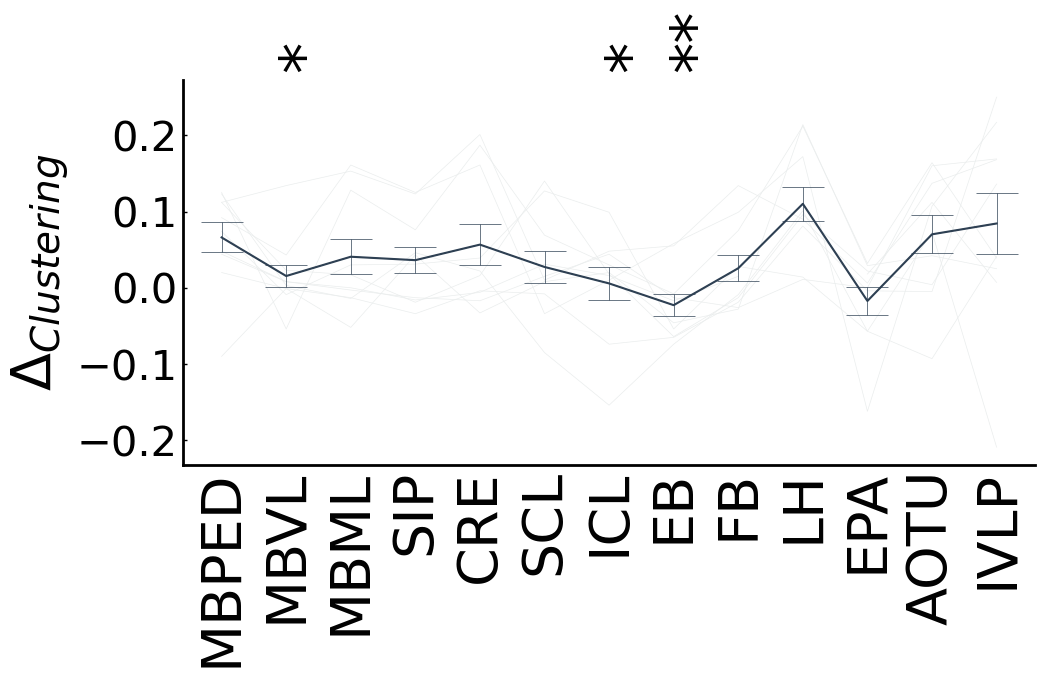

In [6]:
## parameters
region_names_gain = ["MBPED","MBVL", "MBML","SIP","CRE", "SCL", "ICL", "EB", "FB"]
region_names_nongain = ["LH", "EPA", "AOTU","IVLP"]
region_names = region_names_gain + region_names_nongain

metrics = 3

'''
calculate network clustering delta
'''

## all data
calc_clustering, trans_clustering, delta_clustering = [], [], []
for data_index in data_index_list_0:
    calc, trans, delta = [], [], []
    for stage in region_names:
        region_index = region_name_dict[stage]
        
        ori_path = path + 'flies_5HT\\' + data_index + '-stimu\\network_stat\\'
        try:
            data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
            calc.append(data_df.iloc[metrics,1]) # clustering
        except Exception as e:
            calc.append(float('nan'))
        
        ori_path = path + 'flies_5HT\\' + data_index + '-trans-stimu\\network_stat\\'
        try:
            data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
            if data_df.iloc[metrics,1] > 0:
                trans.append(data_df.iloc[metrics,1])
            else:
                trans.append(float('nan'))
        except Exception as e:
            trans.append(float('nan'))
            
        try:
            ori_path = path + 'flies_5HT\\' + data_index + '-stimu\\network_stat\\'
            data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
            data1 = data_df.iloc[metrics,1]
            
            ori_path = path + 'flies_5HT\\' + data_index + '-trans-stimu\\network_stat\\'
            data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
            if data_df.iloc[metrics,1] > 0:
                data2 = data_df.iloc[metrics,1]
                delta.append(round(data1 - data2,4))
            else:
                delta.append(float('nan'))
        except Exception as e:
            delta.append(float('nan'))
            # default values are 20230417-fly2 and 20230420-fly3  region 65, 20230417-fly2 region 73, 20230507-fly1 region 55
            print("No data about delta - ",data_index, region_index) 

    calc_clustering.append(calc)
    trans_clustering.append(trans)
    delta_clustering.append(delta)

## existing data
calc_data, trans_data, delta_data = [], [], []
for stage in region_names:
    region_index = region_name_dict[stage]
    
    data_index_list = []
    if region_index in [55]:
        data_index_list = data_index_list_55
    else:
        data_index_list = data_index_list_0

    calc, trans, delta = [], [], []
    for data_index in data_index_list:
        ori_path = path + 'flies_5HT\\' + data_index + '-stimu\\network_stat\\'
        try:
            data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
            calc.append(data_df.iloc[metrics,1])
        except Exception as e:
            print("No data about G7f - ",data_index, region_index)
        
        ori_path = path + 'flies_5HT\\' + data_index + '-trans-stimu\\network_stat\\'
        try:
            data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
            if data_df.iloc[metrics,1] > 0:
                trans.append(data_df.iloc[metrics,1])
        except Exception as e:
            print("No data about 5HT - ",data_index, region_index) 
            
        try:
            ori_path = path + 'flies_5HT\\' + data_index + '-stimu\\network_stat\\'
            data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
            data1 = data_df.iloc[metrics,1]
            
            ori_path = path + 'flies_5HT\\' + data_index + '-trans-stimu\\network_stat\\'
            data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
            if data_df.iloc[metrics,1] > 0:
                data2 = data_df.iloc[metrics,1]
                delta.append(round(data1 - data2,4))
        except Exception as e:
            print("No data about delta - ",data_index, region_index) 

    calc_data.append(calc)
    trans_data.append(trans)
    delta_data.append(delta)

'''
Test
'''

## some regions of the specified flies are not used
list_0 = [0,1,2,3,4,5,6,8,9]

## process the regions without accuracy gain
base_lh = [i[9] for i in delta_clustering if not math.isnan(i[9])]
base_epa = [i[10] for i in delta_clustering if not math.isnan(i[10])]
base_aotu = [i[11] for i in delta_clustering if not math.isnan(i[11])]
base_ivlp = [i[12] for i in delta_clustering if not math.isnan(i[12])]

## test between each region with accuracy gain and the average values of regions without gain
test_info = []
for reion_i in range(len(region_names_gain)):
    epa_new = [base_epa[i] for i in list_0]
    aotu_new = [base_aotu[i] for i in list_0]
    ivlp_new = [base_ivlp[i] for i in list_0]
    nongain_list = (np.array(base_lh) + np.array(epa_new) + np.array(aotu_new) + np.array(ivlp_new)) / 4
    base_i = [i[reion_i] for i in delta_clustering if not math.isnan(i[reion_i])]
    i_new = [base_i[j] for j in  list_0]

    stat, p_value = stats.wilcoxon(i_new, nongain_list, alternative='less', correction=True)
    if p_value > 0.05:
        test_info.append("")
    elif p_value <= 0.05 and p_value > 0.01:
        test_info.append("*")
    elif p_value <= 0.01 and p_value > 0.001:
        test_info.append("**")
    elif p_value <= 0.001 and p_value > 0.0001:
        test_info.append("***")
    elif p_value < 0.0001:
        test_info.append("****")
        
'''
graphing
'''
avg = [np.mean(i) for i in delta_data]
std = [np.std(i) for i in delta_data]
std_yy = np.array(std) / math.sqrt(10)
plt.figure(figsize=(11,5),dpi=100,facecolor="w")
ax = plt.subplot(1,1,1)
## plot recordings of each fly
for i in delta_clustering:
    plt.plot(i, color = "#EAEDED", linewidth = 0.5)
## plot average recordings
plt.errorbar(region_names, avg, yerr = std_yy, fmt = '', ecolor = '#2E4053', elinewidth = 0.5, color = "#2E4053", capsize = 15, capthick = 0.5)
plt.plot(avg, color = "#2E4053", linewidth = 0.5)
## add testing info
for i in range(len(region_names_gain)):
    plt.text(i * 1.01 - 0.15, 0.3, test_info[i], fontsize = 45, rotation = 90)
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=15,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
ax.set_ylabel(r'$\Delta_{Clustering}$', fontsize= 40)
plt.xticks(rotation = 90, fontsize = 40)
plt.yticks(fontsize = 30)
xlabels = ax.get_xticklabels()
plt.savefig(path+"single_region_networks-Vis\\network_calustering_delta_5ht.png",  dpi = 300, bbox_inches='tight')
plt.savefig(path+"single_region_networks-Vis\\network_calustering_delta_5ht.pdf",  dpi = 300, bbox_inches='tight')
plt.show()

## Figure S8-N

-------------- MBML ---------------


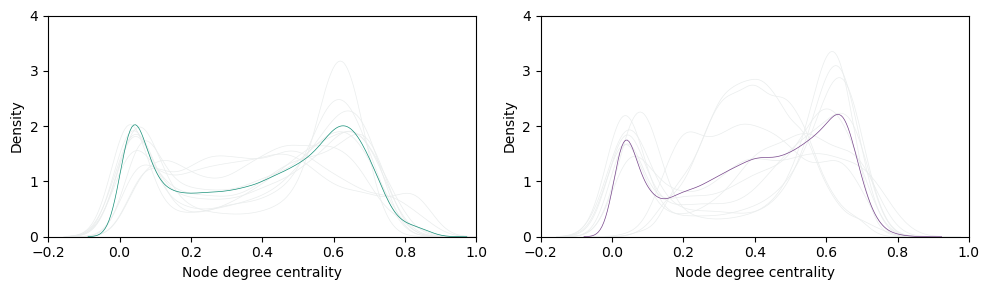

-------------- LH ---------------


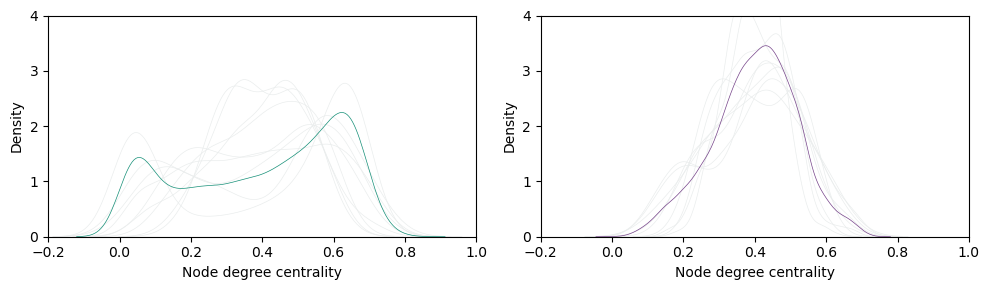

-------------- MBML ---------------


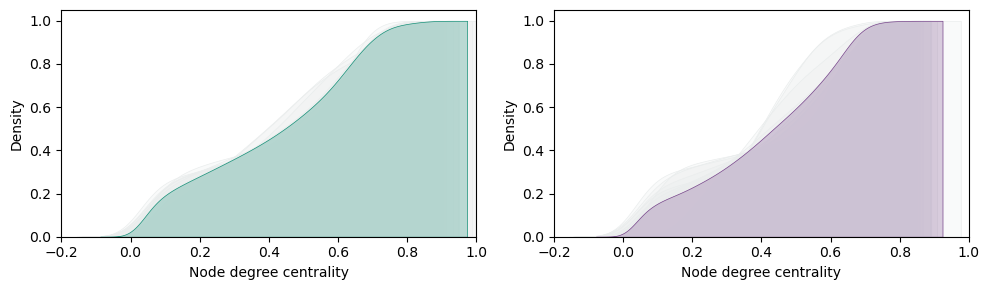

-------------- LH ---------------


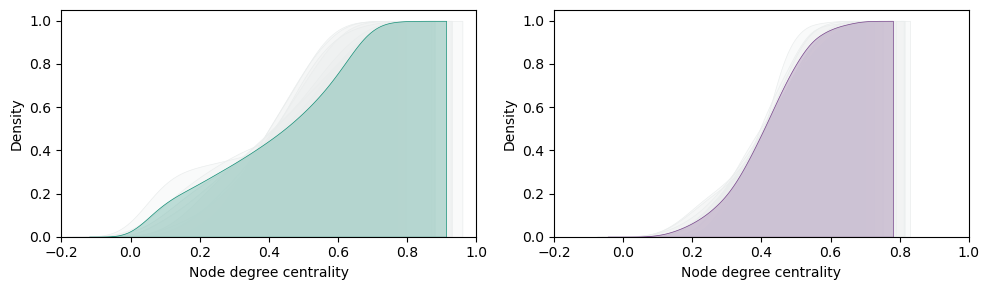

In [7]:
## parameters
region_names_gain = ["MBPED","MBVL", "MBML","SIP","CRE", "SCL", "ICL", "EB", "FB"]
region_names_nongain = ["LH", "EPA", "AOTU","IVLP"]
region_names = region_names_gain + region_names_nongain

metrics = 10

'''
load data of node centralityies
'''

value_total, value_total1 = {}, {}
for region in region_names:   
    region_index = region_name_dict[region]
        
    data_index_list = []
    if region_index in [55]:
        data_index_list = data_index_list_55
    else:
        data_index_list = data_index_list_0

    calc_data, trans_data = [], []
    for data_index in data_index_list: 
        ori_path = path + 'flies_5HT\\' + data_index + '-stimu\\network_stat\\'
        data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
        sti =  data_df.iloc[metrics,1]
        calc_data.append([float(i) for i in sti[1:-1].split(', ') if len(i) > 0])

        ori_path = path + 'flies_5HT\\' + data_index + '-trans-stimu\\network_stat\\'
        data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
        degrees_sti =  data_df.iloc[metrics,1]
        trans_data.append([float(i) for i in degrees_sti[1:-1].split(', ') if len(i) > 0])
   
    value_total[region] = [calc_data,trans_data]

'''
graphing
'''

## PDF
cnt = 0
for stage in ["MBML","LH"]:
    print("--------------", stage, "---------------")
    plt.figure(figsize=(10,3), tight_layout = True)
    ax = plt.subplot(1,2,1)
    fla_list = []
    for i in range(len(value_total[stage][0])):
        sns.kdeplot(value_total[stage][0][i], color = "#EAEDED",linewidth = 0.5)
        fla_list += value_total[stage][0][i]
    sns.kdeplot(fla_list, label = "G7f", color = '#148F77',linewidth = 0.5)
    plt.ylabel("Density", fontsize = 10)
    plt.xlabel("Node degree centrality", fontsize = 10)
    plt.ylim(0,4)
    plt.xlim(-0.2,1)
    ax = plt.subplot(1,2,2)
    fla_list = []
    for i in range(len(value_total[stage][1])):
        sns.kdeplot(value_total[stage][1][i], color = "#EAEDED",linewidth = 0.5)
        fla_list += value_total[stage][1][i]
    sns.kdeplot(fla_list, label = "rAch", color = '#76448A',linewidth = 0.5)
    plt.ylabel("Density", fontsize = 10)
    plt.xlabel("Node degree centrality", fontsize = 10)
    plt.ylim(0,4)
    plt.xlim(-0.2,1)
    plt.savefig(path+"single_region_networks-Vis\\regions_central_dist_" + stage + "_5ht_pdf.png",  dpi = 300, bbox_inches='tight')
    plt.savefig(path+"single_region_networks-Vis\\regions_central_dist_" + stage + "_5ht_pdf.pdf",  dpi = 300, bbox_inches='tight')
    plt.show()
    
    cnt += 1
    
## CDF
cnt = 0
for stage in ["MBML","LH"]:
    print("--------------", stage, "---------------")
    plt.figure(figsize=(10,3), tight_layout = True)
    ax = plt.subplot(1,2,1)
    fla_list = []
    for i in range(len(value_total[stage][0])):
        sns.kdeplot(value_total[stage][0][i], color = "#EAEDED", linewidth = 0.5, cumulative = True, fill = True)
        fla_list += value_total[stage][0][i]
    sns.kdeplot(fla_list, label = "G7f", color = '#148F77', linewidth = 0.5, cumulative = True, fill = True)
    plt.ylabel("Density", fontsize = 10)
    plt.xlabel("Node degree centrality", fontsize = 10)
    plt.xlim(-0.2,1)
    ax = plt.subplot(1,2,2)
    fla_list = []
    for i in range(len(value_total[stage][1])):
        sns.kdeplot(value_total[stage][1][i], color = "#EAEDED", linewidth = 0.5, cumulative = True, fill = True)
        fla_list += value_total[stage][1][i]
    sns.kdeplot(fla_list, label = "rAch", color = '#76448A', linewidth = 0.5, cumulative = True, fill = True)
    plt.ylabel("Density", fontsize = 10)
    plt.xlabel("Node degree centrality", fontsize = 10)
    plt.xlim(-0.2,1)
    plt.savefig(path+"single_region_networks-Vis\\regions_central_dist_" + stage + "_5ht_cdf.png",  dpi = 300, bbox_inches='tight')
    plt.savefig(path+"single_region_networks-Vis\\regions_central_dist_" + stage + "_5ht_cdf.pdf",  dpi = 300, bbox_inches='tight')
    plt.show()
    
    cnt += 1

## Figure S8-O

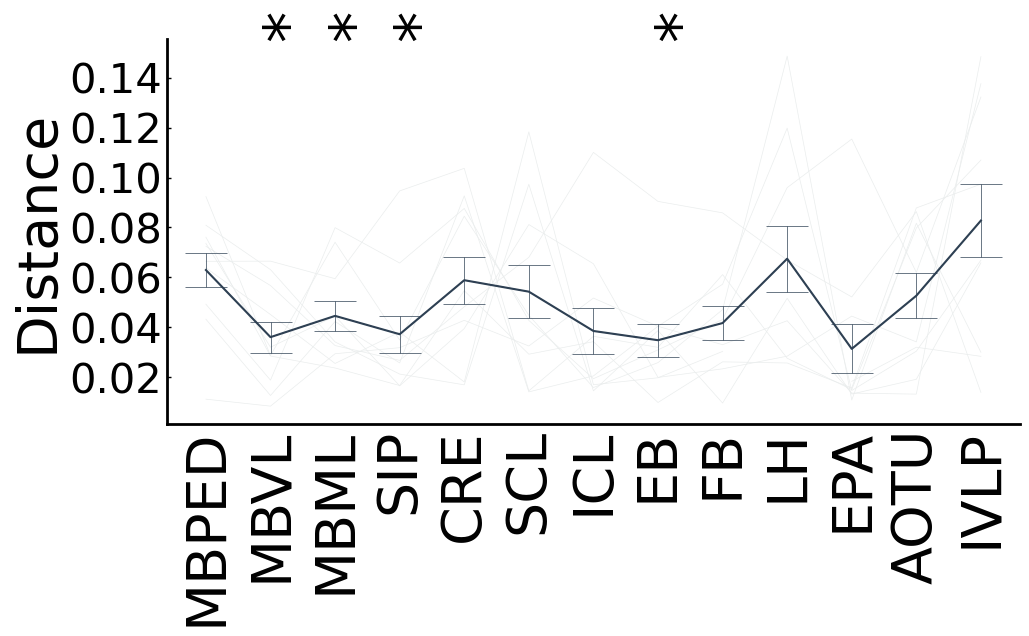

In [8]:
## parameters
region_names_gain = ["MBPED","MBVL", "MBML","SIP","CRE", "SCL", "ICL", "EB", "FB"]
region_names_nongain = ["LH", "EPA", "AOTU","IVLP"]
region_names = region_names_gain + region_names_nongain

measure = 10

## initialization
kl_data, kl_data_notnan = [], {}
for i in region_names:
    region_id = region_name_dict[i]
    kl_data_notnan[region_id] = []

'''
calculate the distance between node centrality distribution of different regions
'''

for stage in region_names:
    region_index = region_name_dict[stage]
    
    delta = [] 
    for data_index in data_index_list_0:
        
        if region_index == 55 and data_index not in data_index_list_55:
            delta.append(float('nan'))
            continue
            
        ori_path = path + 'flies_5HT\\' + data_index + '-stimu\\network_stat\\'
        calc_list = []
        try:
            data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
            sti =  data_df.iloc[measure,1]
            calc_list = [float(i) for i in sti[1:-1].split(', ') if len(i) > 0]
        except Exception as e:
            print("Exception: ", data_index, region_index)

        ori_path = path + 'flies_5HT\\' + data_index + '-trans-stimu\\network_stat\\'
        trans_list = []
        try:
            data_df = pd.read_excel(ori_path + "region_" + str(region_index) + "_network_stat.xlsx", sheet_name = 'stat')
            sti =  data_df.iloc[measure,1]
            trans_list = [float(i) for i in sti[1:-1].split(', ') if len(i) > 0]
        except Exception as e:
            print("Exception: ", data_index, region_index)

        if len(trans_list) > 0 and len(calc_list) > 0:
            kl = stats.wasserstein_distance(calc_list, trans_list) 
#             kl = stats.energy_distance(calc_list, trans_list)
            if kl < 1:
                kl_data_notnan[region_index].append(kl)
                delta.append(kl)
            else:
                delta.append(float('nan'))
        else:
            delta.append(float('nan'))
    kl_data.append(delta)
    
kl_data_t = np.array(kl_data).T            

    
'''
Test
'''

## some regions of the specified flies are not used
list_0 = [0,1,2,3,4,5,6,8,9]

## process the regions without accuracy gain
base_lh = [i[9] for i in kl_data_t if not math.isnan(i[9])]
base_epa = [i[10] for i in kl_data_t if not math.isnan(i[10])]
base_aotu = [i[11] for i in kl_data_t if not math.isnan(i[11])]
base_ivlp = [i[12] for i in kl_data_t if not math.isnan(i[12])]

## test between each region with accuracy gain and the average values of regions without gain
test_info = []
for reion_i in range(len(region_names_gain)):
    epa_new = [base_epa[i] for i in list_0]
    aotu_new = [base_aotu[i] for i in list_0]
    ivlp_new = [base_ivlp[i] for i in list_0]
    nongain_list = (np.array(base_lh) + np.array(epa_new) + np.array(aotu_new) + np.array(ivlp_new)) / 4
    base_i = [i[reion_i] for i in kl_data_t if not math.isnan(i[reion_i])]
    i_new = [base_i[j] for j in  list_0]
         
    stat, p_value = stats.wilcoxon(i_new, nongain_list, alternative='less', correction=True)
    if p_value > 0.05:
        test_info.append("")
    elif p_value <= 0.05 and p_value > 0.01:
        test_info.append("*")
    elif p_value <= 0.01 and p_value > 0.001:
        test_info.append("**")
    elif p_value <= 0.001 and p_value > 0.0001:
        test_info.append("***")
    elif p_value < 0.0001:
        test_info.append("****")
        
'''
graphing
'''

avg, std = [], []
for i in region_names:
    region_id = region_name_dict[i]
    avg.append(np.mean(kl_data_notnan[region_id]))
    std.append(np.std(kl_data_notnan[region_id]))
std_yy = np.array(std) / math.sqrt(10)
plt.figure(figsize=(11,5),dpi=100,facecolor="w")
ax = plt.subplot(1,1,1)
## plot recordings of each fly
for i in range(len(kl_data[0])):
    plot_data = [row[i] for row in kl_data]
    plt.plot(plot_data, color = "#EAEDED", linewidth = 0.5)
## plot average recordings
plt.errorbar(region_names, avg, yerr = std_yy, fmt = '', ecolor = '#2E4053', elinewidth = 0.5, color = "#2E4053", capsize = 15, capthick = 0.5)
plt.plot(avg, color = "#2E4053", linewidth = 0.5)
## add testing info
for i in range(len(region_names_gain)):
    plt.text(i * 1.01 - 0.15, 0.16, test_info[i], fontsize = 45, rotation = 90)
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=15,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
ax.set_ylabel("Distance", fontsize= 40)
plt.xticks(rotation = 90, fontsize = 40)
plt.yticks(fontsize = 30)
plt.savefig(path+"single_region_networks-Vis\\network_node_central_df_5ht.png",  dpi = 300, bbox_inches='tight')
plt.savefig(path+"single_region_networks-Vis\\network_node_central_df_5ht.pdf",  dpi = 300, bbox_inches='tight')
plt.show()
